In [2]:
#import packages first 
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Full Project 2 - Data Science MLB Hitting Data Analysis

## MLB Hitting and Salary Exploratory Data Analysis 

### Exploratory Data Science 

This project analyzes Major League Baseball (MLB) hitting data to uncover trends, patterns, and insights related to team performance and hitting statistics. The focus is on contemporary team and salary data sourced from Lahman Baseball Reference. Statistics have become increasingly vital in baseball, often serving as the foundation for decisions about acquiring players. Identifying key metrics that contribute to team success can help teams target specific attributes in prospects or new players, optimizing their chances of winning games.

### Objectives

The key objectives of this project are:
1. Identify factors contributing to hitting success by analyzing various metrics.
2. Explore trends in a "birds eye view" across recent seasons.
3. Examine relationships between hitting statistics to understand how they correlate with one another.

### Data Science Concepts

The data used in this EDA is sourced from "Lahman" baseball reference website. The EDA includes:
- **Data Cleaning**: Preparing the data by handling missing values and standardizing formats.
- **Feature Engineering**: Creating new variables or aggregating data to add value to the dataset.
- **Variable Evaluation**: Check data for correct formatting, possible anomalies, missing data, etc.
- **Statistical Analysis and Visualization**: Using visualization reveal trends and relationships.

In [5]:
# Read in data using pandas.read_csv

salary = pd.read_csv("data/Salaries.csv", encoding='ISO-8859-1')
people = pd.read_csv("data/People.csv", encoding='ISO-8859-1')
batting = pd.read_csv("data/Batting.csv", encoding='ISO-8859-1')
team_franchise = pd.read_csv("data/TeamsFranchises.csv", encoding='ISO-8859-1')
teams = pd.read_csv("data/Teams.csv", encoding='ISO-8859-1')

In [6]:
# Filter data to only active franchises

active_franchise = team_franchise[team_franchise["active"]=="Y"]
active_franchise.head()

,franchID,franchName,active,NAassoc
1,ANA,Los Angeles Angels of Anaheim,Y,NaN
2,ARI,Arizona Diamondbacks,Y,NaN
4,ATL,Atlanta Braves,Y,BNA
5,BAL,Baltimore Orioles,Y,NaN
13,BOS,Boston Red Sox,Y,NaN


In [7]:
active_teams = teams[teams["franchID"].isin(active_franchise["franchID"])]
earliest_year = active_teams["yearID"].min()

# When have all active franchises joined the MLB?
last_year_join = active_teams[active_teams["franchID"] == "ARI"]["yearID"].min()
active_teams_1998 = active_teams[active_teams["yearID"] >= 1998]

# 1998 to 2023 is when the most relevant data is available including all active franchises
# Calculate win percent and compare the trend with playoff birth 
active_teams_1998['Win%'] = active_teams_1998["W"]/active_teams_1998["G"]
active_teams_1998.head()

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/2364204332.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_teams_1998['Win%'] = active_teams_1998["W"]/active_teams_1998["G"]


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win%
2265,1998,AL,ANA,ANA,W,2,162,81.0,85,77,...,0.983,Anaheim Angels,Edison International Field,2519280.0,102,102,ANA,ANA,ANA,0.524691
2266,1998,AL,BAL,BAL,E,4,162,81.0,79,83,...,0.987,Baltimore Orioles,Oriole Park at Camden Yards,3684650.0,98,97,BAL,BAL,BAL,0.487654
2267,1998,AL,BOS,BOS,E,2,162,81.0,92,70,...,0.983,Boston Red Sox,Fenway Park II,2314704.0,102,101,BOS,BOS,BOS,0.567901
2268,1998,AL,CHA,CHW,C,2,163,81.0,80,82,...,0.977,Chicago White Sox,Comiskey Park II,1391146.0,98,98,CHW,CHA,CHA,0.490798
2269,1998,AL,CLE,CLE,C,1,162,81.0,89,73,...,0.982,Cleveland Indians,Jacobs Field,3467299.0,103,102,CLE,CLE,CLE,0.549383


/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/1953493962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_teams_1998['MadePlayoffs'] = active_teams_1998[['DivWin', 'WCWin', 'LgWin']].apply(lambda x: 1 if 'Y' in x.values else 0, axis=1)


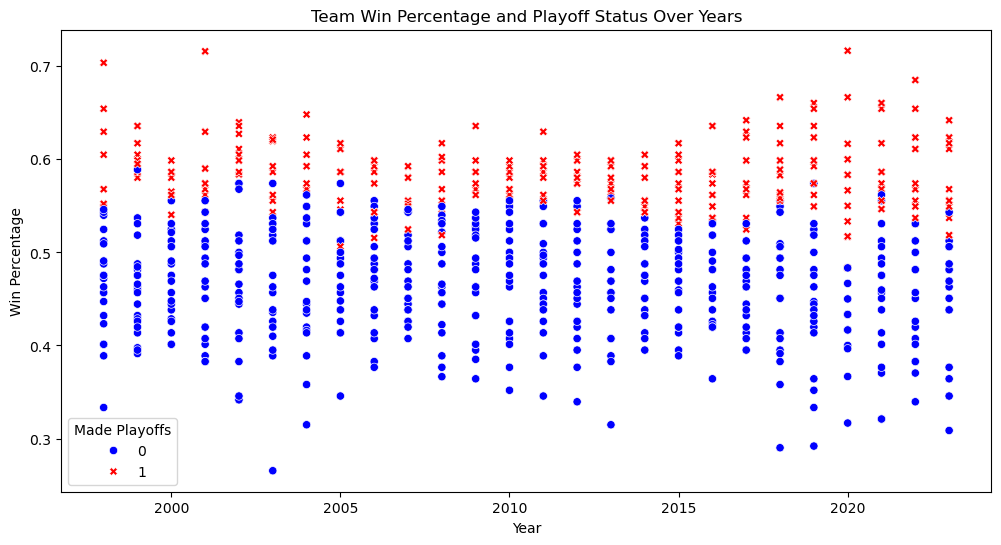

In [8]:
# Add a new column 'MadePlayoffs' to indicate if a team made the playoffs
active_teams_1998['MadePlayoffs'] = active_teams_1998[['DivWin', 'WCWin', 'LgWin']].apply(lambda x: 1 if 'Y' in x.values else 0, axis=1)

# Plot win percentage with playoff status as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=active_teams_1998, x='yearID', y='Win%', hue='MadePlayoffs', style='MadePlayoffs', palette={1: 'red', 0: 'blue'}, marker='o')
plt.title('Team Win Percentage and Playoff Status Over Years')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.legend(title='Made Playoffs')
plt.show()

### The graph shows that most teams that make the playoffs have a win% over .500

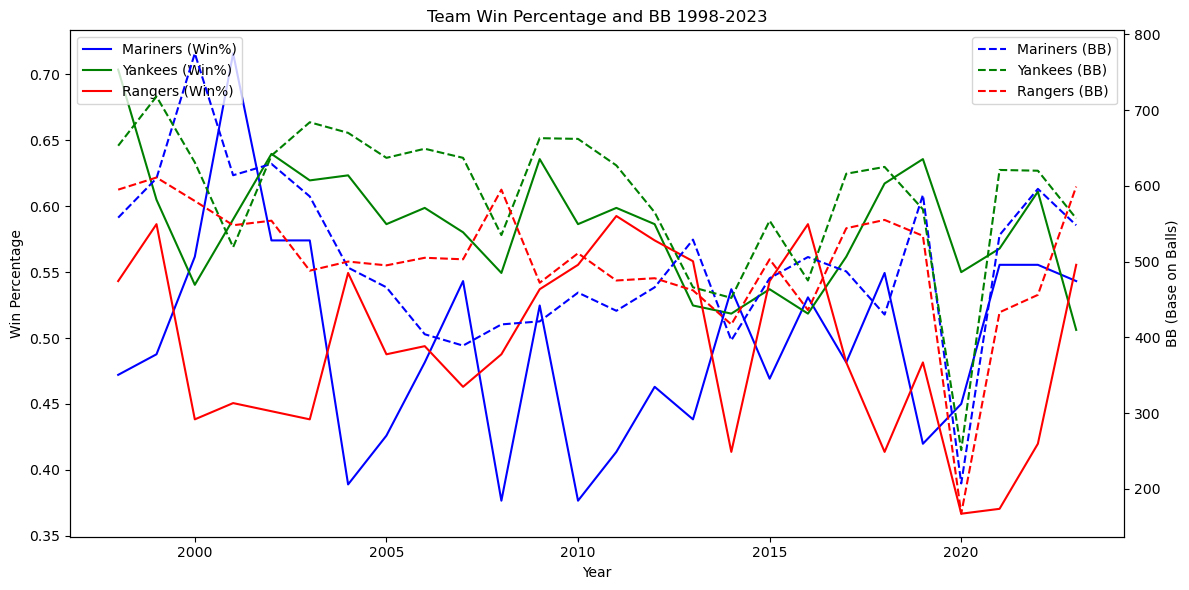

In [9]:
# Lets choose 3 random teams and see the relation walks might have with win pct
# Filter data for the three teams
SEA_data = active_teams_1998[active_teams_1998['franchID'] == "SEA"]
NYY_data = active_teams_1998[active_teams_1998['franchID'] == "NYY"]
TEX_data = active_teams_1998[active_teams_1998['franchID'] == "TEX"]

# Create subplots for Win Percentage and BB
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Win Percentage
sns.lineplot(data=SEA_data, x="yearID", y="Win%", label="Mariners (Win%)", ax=ax1, color="blue")
sns.lineplot(data=NYY_data, x="yearID", y="Win%", label="Yankees (Win%)", ax=ax1, color="green")
sns.lineplot(data=TEX_data, x="yearID", y="Win%", label="Rangers (Win%)", ax=ax1, color="red")
ax1.set_title('Team Win Percentage and BB 1998-2023')
ax1.set_xlabel('Year')
ax1.set_ylabel('Win Percentage')
ax1.legend(loc="upper left")

# Add a secondary y-axis for BB
ax2 = ax1.twinx()
sns.lineplot(data=SEA_data, x="yearID", y="BB", label="Mariners (BB)", ax=ax2, color="blue", linestyle="dashed")
sns.lineplot(data=NYY_data, x="yearID", y="BB", label="Yankees (BB)", ax=ax2, color="green", linestyle="dashed")
sns.lineplot(data=TEX_data, x="yearID", y="BB", label="Rangers (BB)", ax=ax2, color="red", linestyle="dashed")
ax2.set_ylabel('BB (Base on Balls)')
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

## Clean the data to active teams and complete season statistics 
Active teams have been selected from the data but another discrepency is detected. There is a significant dip in the year 2020 due to the pandemic and must be removed so only complete seasons are represented.

In [10]:
# Eliminate half season from 2020, 162 games = full season 
full_season = active_teams_1998[active_teams_1998['G']>=162]

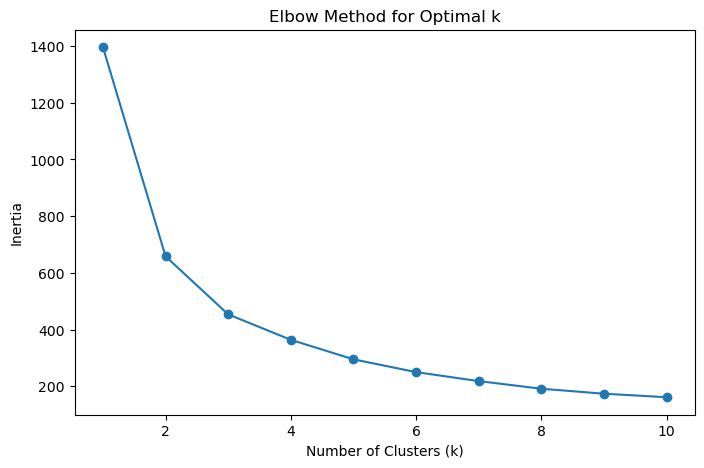

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# features to be used for clustering 
features = full_season[['R', 'BB']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# plot curve in order to select the amount of optimal number of clusters to make 
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [81]:
# k-means with the optimal number of clusters
# I chose 4 because the graph goes from steep to flat at that cluster value
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
full_season['Cluster'] = kmeans.labels_
print(full_season[['franchID', 'Win%', 'R', 'BB', 'Cluster']])

     franchID      Win%    R   BB  Cluster
2265      ANA  0.524691  787  510        2
2266      BAL  0.487654  817  593        1
2267      BOS  0.567901  876  541        1
2268      CHW  0.490798  861  551        1
2269      CLE  0.549383  850  630        1
...       ...       ...  ...  ...      ...
3040      PIT  0.469136  692  556        2
3041      SDP  0.506173  752  653        1
3042      SFG  0.487654  674  544        2
3043      STL  0.438272  719  570        2
3044      WSN  0.438272  700  423        0

[698 rows x 5 columns]


/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/3113167335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_season['Cluster'] = kmeans.labels_


### Visualize KMeans Clustering Using 3 Clusters and Wins as the metric for success 
I adjusted my predictors to improve clustering based on the feature importance I discovered later in this notebook

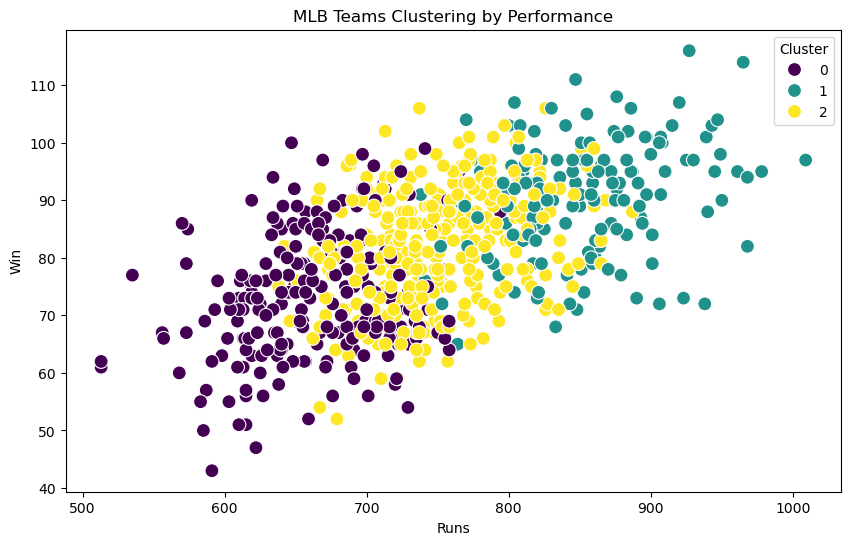

In [120]:
# Scatterplot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=full_season,
    x='R',
    y='W',
    hue='Cluster',
    palette='viridis',
    s=100
)

plt.title('MLB Teams Clustering by Performance')
plt.xlabel('Runs')
plt.ylabel('Win')
plt.legend(title='Cluster')
plt.show()

### Correlation Heatmap

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/1415995069.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_active_teams_1998 = numerical_active_teams_1998.replace({'Y': 1, 'N': 0})


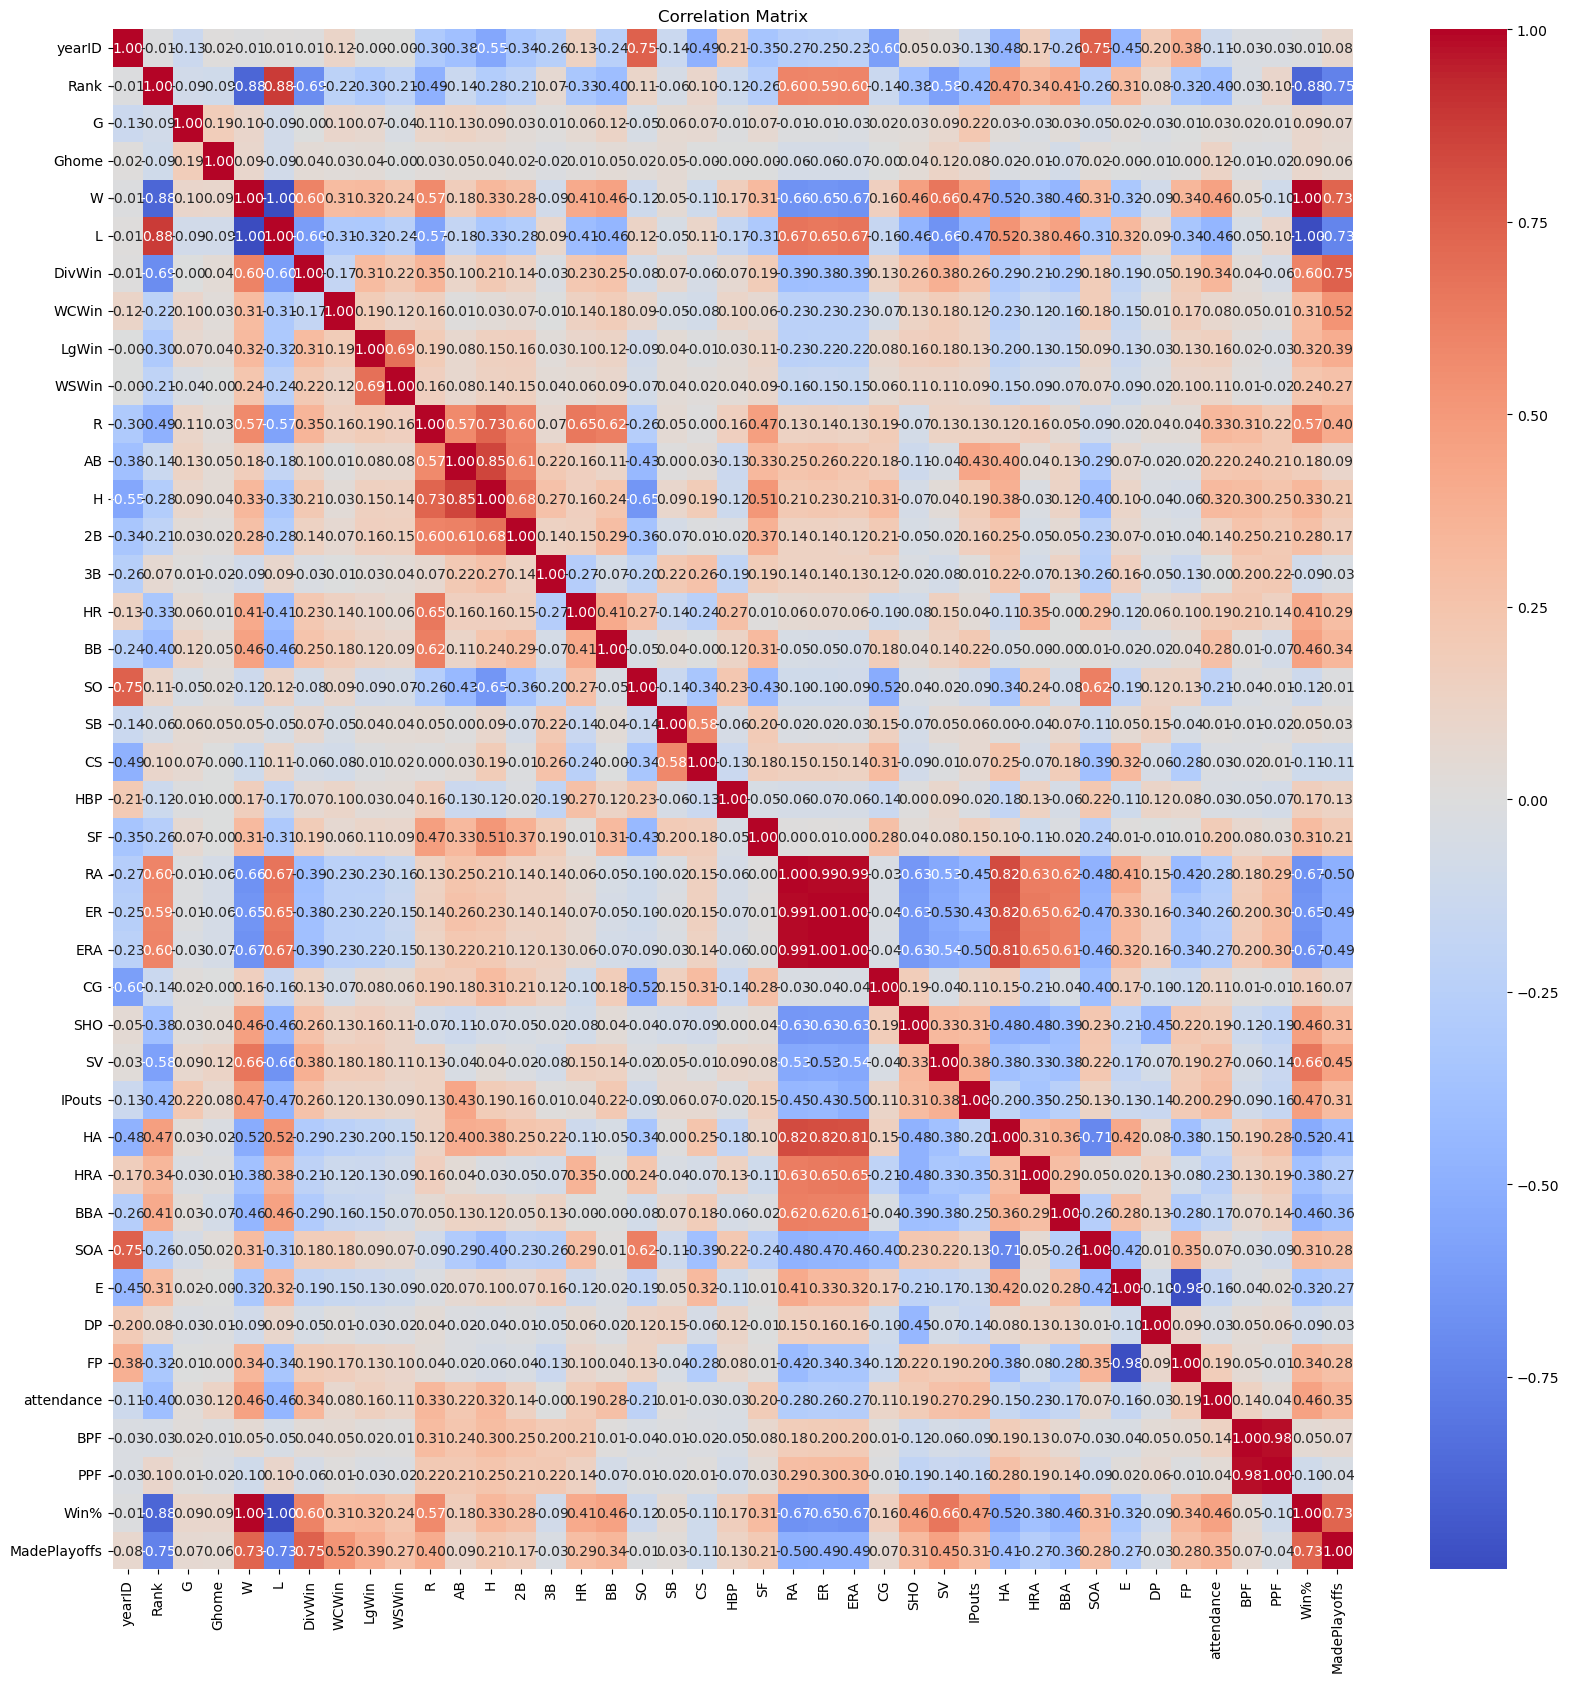

In [123]:
# correlation matrix
numerical_active_teams_1998 = full_season.drop(['lgID','teamID', 'franchID','divID', 'name','park','teamIDBR','teamIDlahman45','teamIDretro', 'Cluster'], axis=1) 
numerical_active_teams_1998 = numerical_active_teams_1998.replace({'Y': 1, 'N': 0})
correlation_matrix = numerical_active_teams_1998.corr()
# visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Potential findings and flaws with the heat map
Predictors such as GHome, IPOut, AB, BPF, and PPF, which are inversely or directly related to one another, often exhibit extreme correlations that can mislead analysis. Therefore, these variables should be excluded from further consideration. In contrast, more meaningful predictors include walks, and doubles (2B) in relation to win percentage. These metrics align intuitively with baseball strategy. For example, reaching second base, often referred to as being in "scoring position," significantly increases the likelihood of scoring a run with a single hit to the outfield. This ability to capitalize on scoring opportunities directly impacts a team’s chances of winning games.

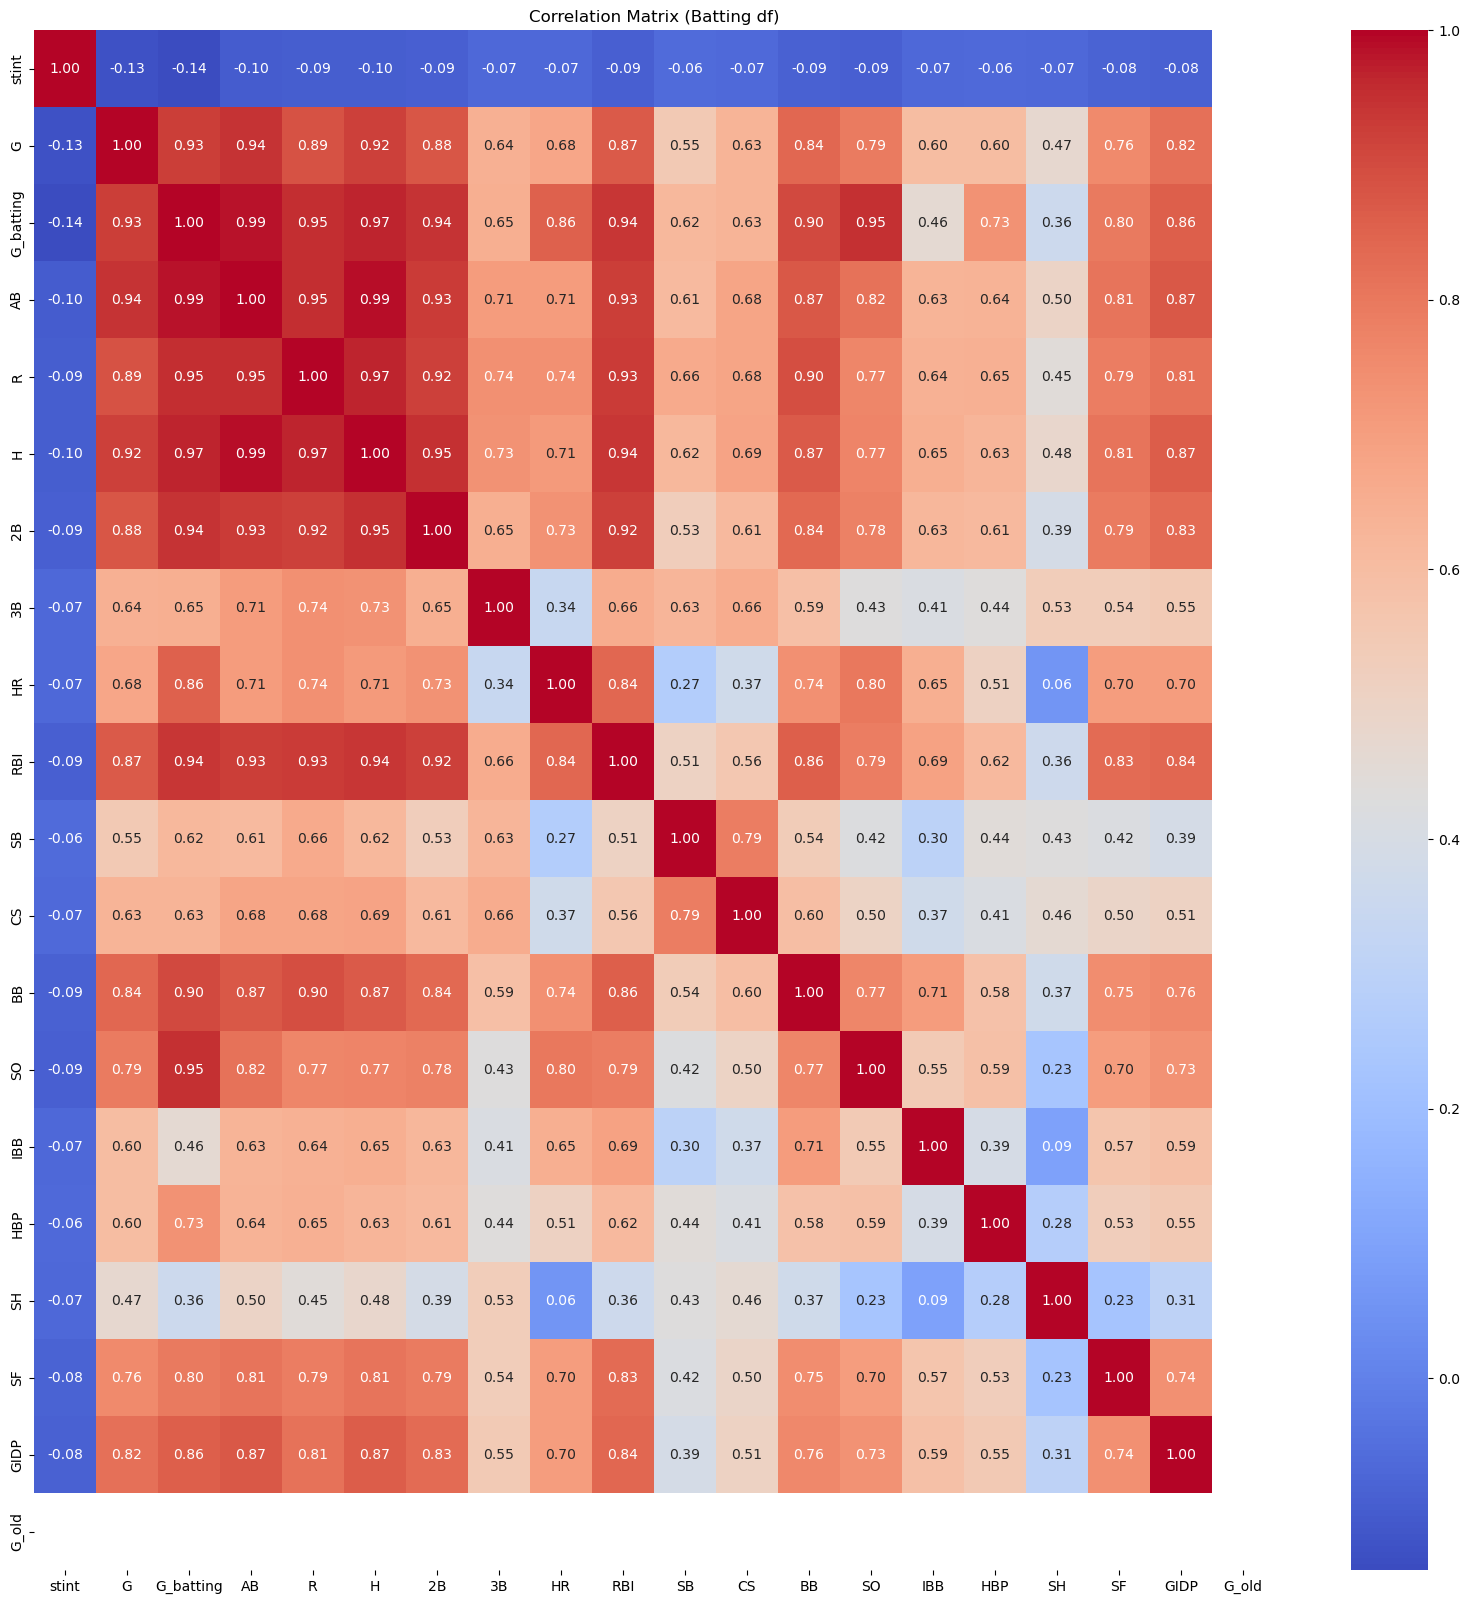

In [125]:
# correlation matrix
# what makes a good hitter?
batting['yearID'] = batting['yearID'].astype(int)
numerical_batting_data = batting[(batting['yearID'] >= 1998) & (batting['yearID'] != 2020)]
numerical_batting_data = batting.drop(['playerID', 'yearID', 'teamID','lgID'], axis=1)
correlation_matrix_batting = numerical_batting_data .corr()
# visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_batting, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Batting df)')
plt.show()

### Scatterplot to visualize Association Between Runs and Walks 

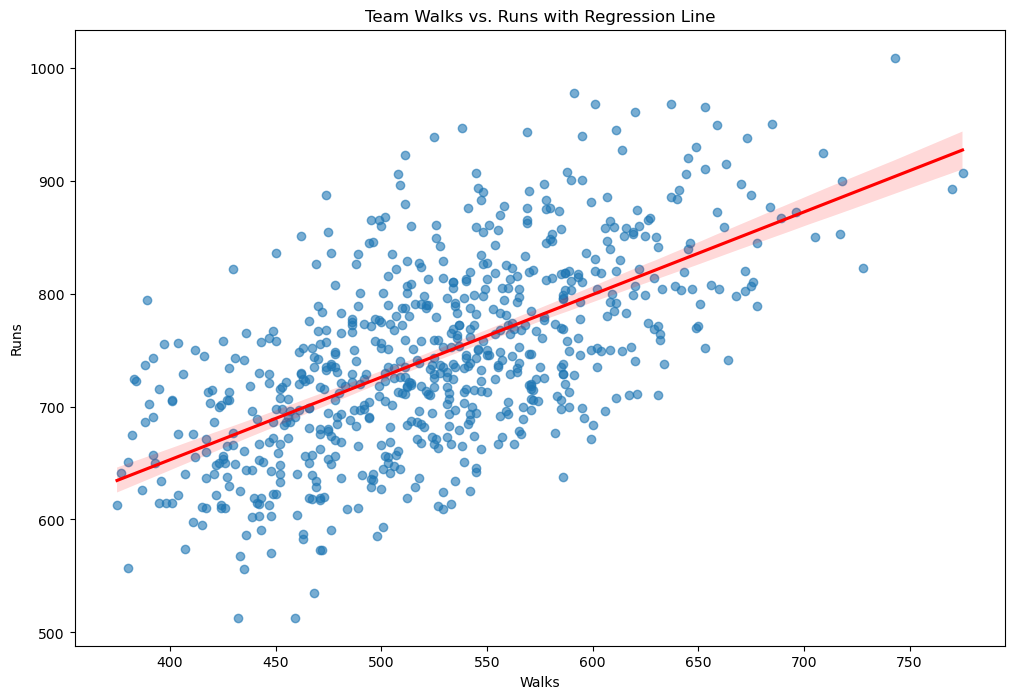

In [127]:
# lets look at walks and runs and see how they are related on a scatterplot
walks = full_season['BB']
runs = full_season['R']

plt.figure(figsize=(12, 8))
sns.regplot(data=full_season, x='BB', y='R', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Team Walks vs. Runs with Regression Line')
plt.xlabel('Walks')
plt.ylabel('Runs')
plt.show()

In [128]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


### Visualize How Salaries Have Changed Over the Years

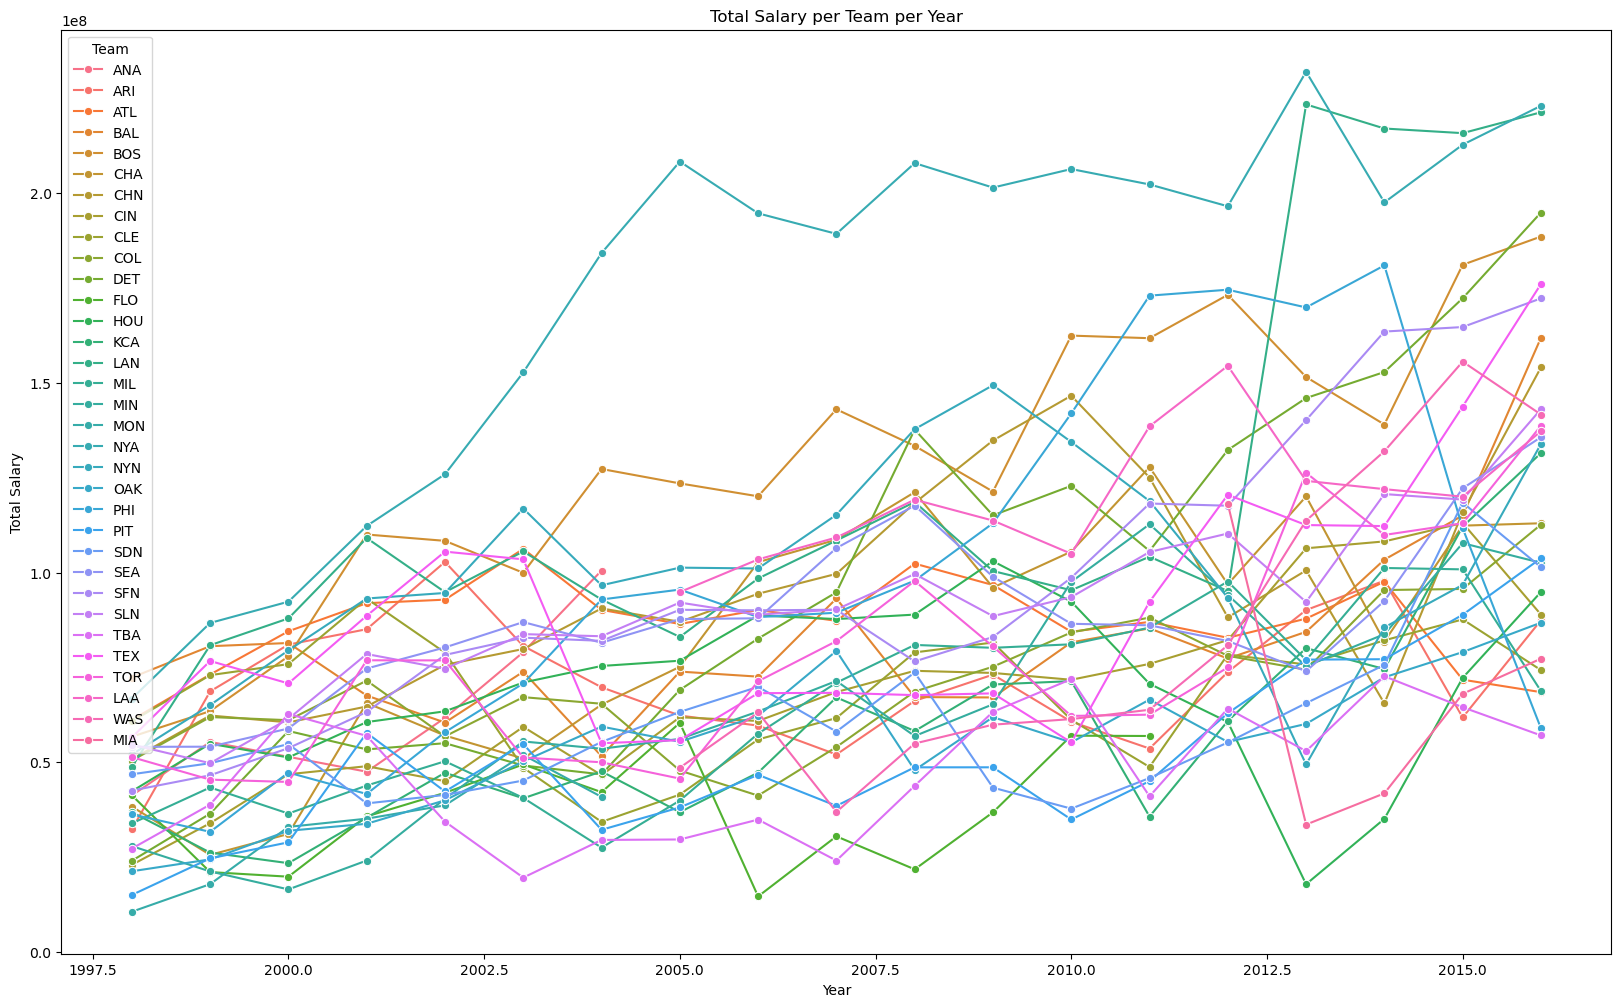

In [130]:
# investigate plot of teams salary per year
salary['yearID'] = salary['yearID'].astype(int)

# Filter out data from 2020 and years before 1997
salary_filter = salary[(salary['yearID'] >= 1998) & (salary['yearID'] != 2020)]
salary_per_team_year = salary_filter.groupby(['yearID', 'teamID'])['salary'].sum().reset_index()

# plot the data
plt.figure(figsize=(20, 12))
sns.lineplot(data=salary_per_team_year, x='yearID', y='salary', hue='teamID', marker='o')
plt.title('Total Salary per Team per Year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.legend(title='Team')
plt.show()


In [20]:
# this graph can indicate the growth of salary totals in the MLB

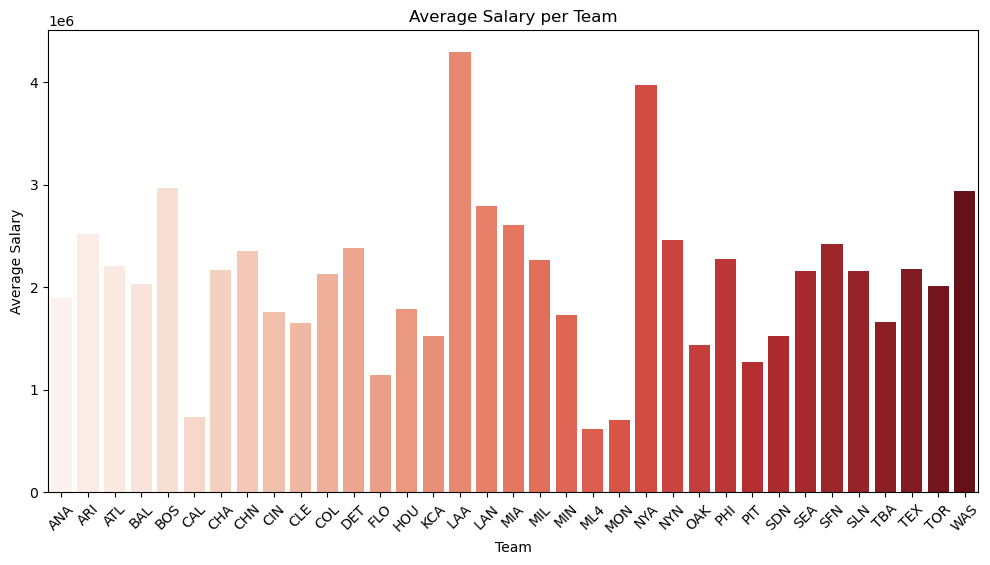

In [21]:
# Observe bar plot of average salary per team
avg_salary_per_team = salary.groupby('teamID')['salary'].mean().reset_index()
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_salary_per_team, x='teamID', y='salary', hue='teamID', palette='Reds')
plt.title('Average Salary per Team')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

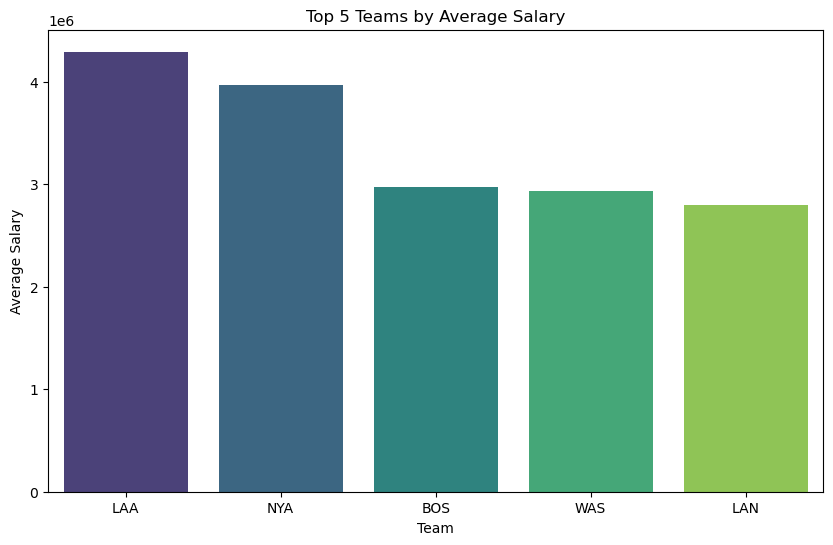

In [100]:
top_5_teams = avg_salary_per_team.nlargest(5, 'salary')
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_teams, x='teamID', y='salary', hue='teamID', palette='viridis')
plt.title('Top 5 Teams by Average Salary')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.show()

In [102]:
# filter batting data and create batting average column 
# Also lets look at batting data specific to teams to make sure everything is normal looking
batting_after_1997 = batting[batting['yearID']>1997]
batting_after_1997["AVG"] = batting_after_1997["H"]/batting_after_1997["AB"]
batting_avg_per_team = batting_after_1997.groupby('teamID')['AVG'].mean().reset_index()
batting_avg_per_team.head()

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/3162545022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_after_1997["AVG"] = batting_after_1997["H"]/batting_after_1997["AB"]


,teamID,AVG
0,ANA,0.222701
1,ARI,0.195365
2,ATL,0.192031
3,BAL,0.207233
4,BOS,0.209615


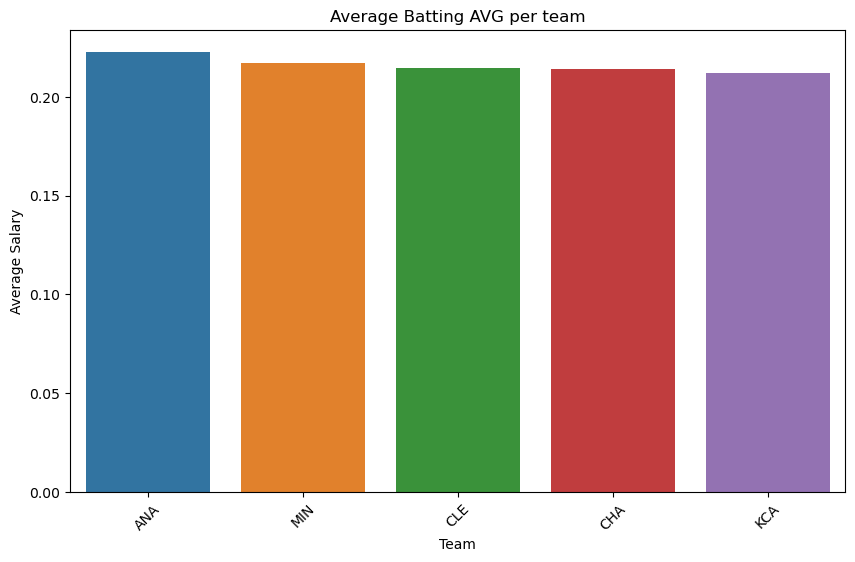

In [24]:
# plot batting average per team
top_5_teams = batting_avg_per_team.nlargest(5, 'AVG')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_teams, x='teamID', y='AVG', hue='teamID')
plt.title('Average Batting AVG per team')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

### Conclusion of EDA

The investigation explores multiple aspects of Major League Baseball performance, focusing on the relationship between a franchise's salary and its success, as well as the correlation between walks and runs. The connection between walks and runs is intuitive, as more players reaching base increases the likelihood of scoring. Walks, being a common way to reach base, naturally contribute to this relationship, making it a fundamental aspect of the game. Correlations of walks and 2B were standouts in the dataset. 

A scatterplot analysis was conducted to determine the likelihood of a team making the playoffs based on its win percentage. This visualization provided insights into the threshold of success required for postseason qualification, highlighting a clear pattern where higher win percentages consistently lead to playoff appearances.

In addition, heatmaps were used to analyze the relationships within team and player statistics. One heatmap focused on team-level metrics, providing a comprehensive overview of how various team statistics correlate with each other and overall performance. The other heatmap examined batting statistics, shedding light on individual contributions to team success. These visual tools helped identify both expected and unexpected relationships in the data. Clustering analysis provided valuable insights by grouping MLB teams based on performance metrics such as win percentage, runs, and walks. This unsupervised learning approach revealed natural groupings of teams, distinguishing high-performing franchises from average and lower-performing ones. 

Another critical aspect of the investigation was the trend of increasing salary caps in Major League Baseball. The analysis showed that franchises with higher payrolls are more likely to win the World Series, underscoring the growing necessity of substantial financial investment to achieve championship success. This trend reflects the evolving financial dynamics of the sport, where competitive spending often equates to better player acquisition and ultimately, better team performance.

The data provided a robust foundation for exploring the factors that drive success in baseball, offering actionable insights for teams aiming to optimize performance.

In [26]:
# Merge Salary Data with Team data 
merged_data = pd.merge(salary_per_team_year, full_season, on=['yearID', 'teamID'], how='inner')
merged_data = merged_data.drop(['lgID','teamID', 'franchID','divID', 'name','park','teamIDBR','teamIDlahman45','teamIDretro'], axis=1)
merged_data = merged_data.replace({'Y': 1, 'N': 0})

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/2531396690.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_data = merged_data.replace({'Y': 1, 'N': 0})


### Further Investigation of Salaries in Relation With World Series Win
**Comparing the Seattle Mariners total salary (who have never won a World Series in frnachise history) with the total salary of the World Series team of the same year**

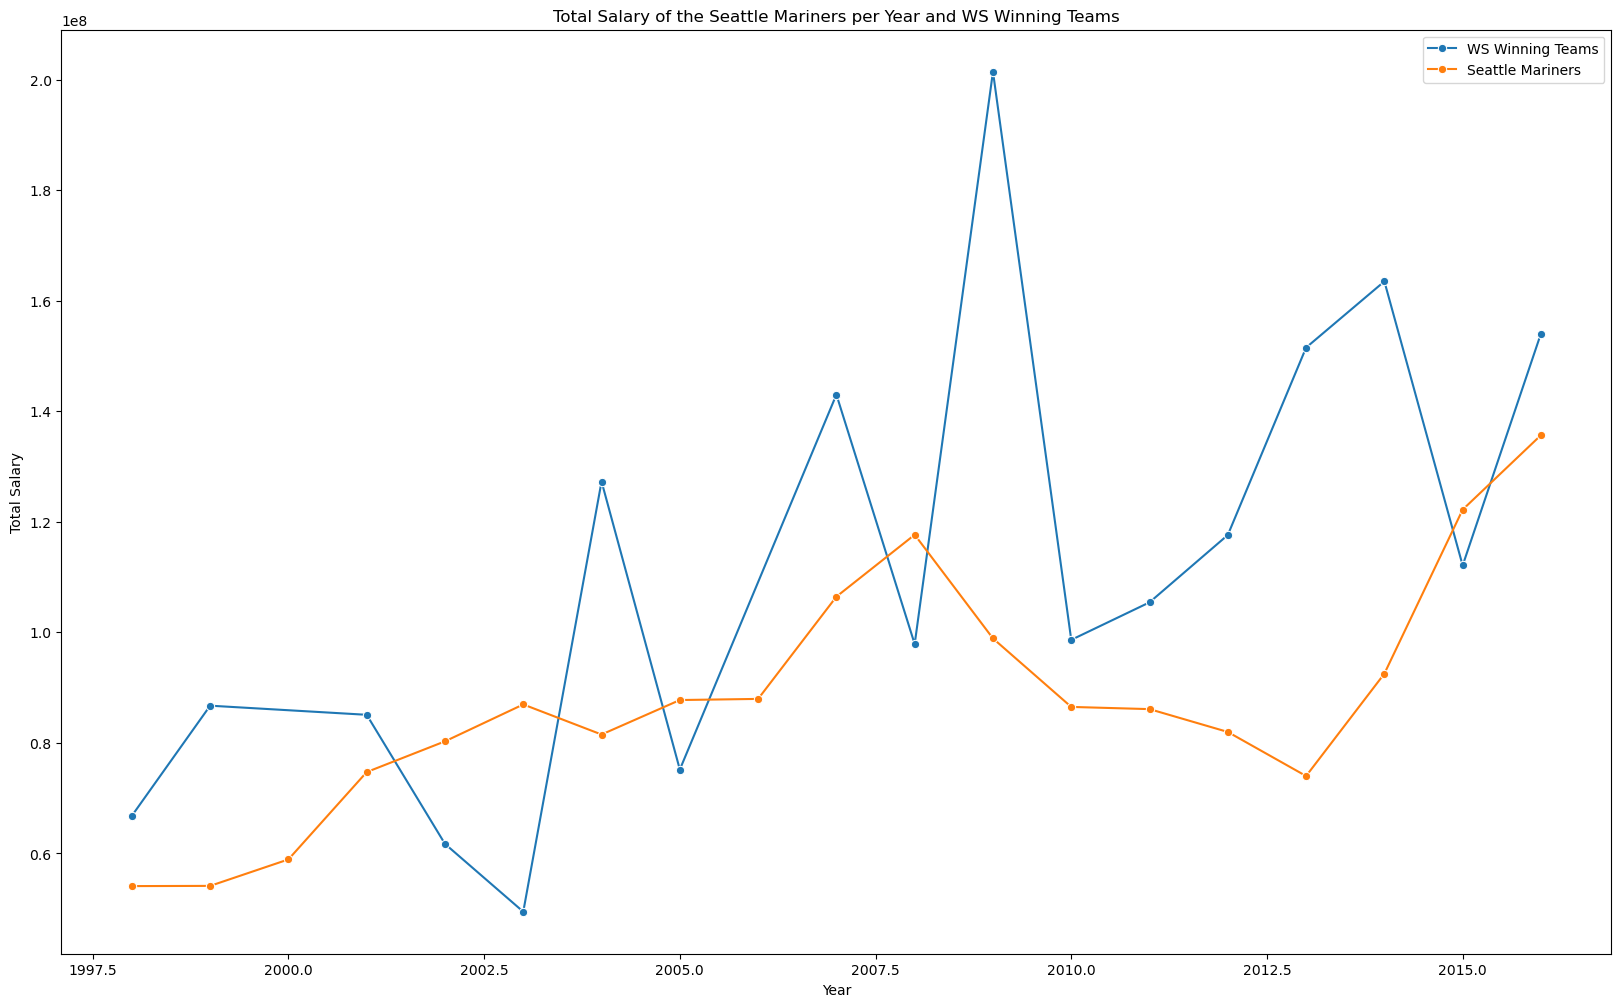

In [112]:
salary_filter = salary[(salary['yearID'] >= 1998) & (salary['yearID'] != 2020)]
salary_per_team_year = salary_filter.groupby(['yearID', 'teamID'])['salary'].sum().reset_index()
salary_sea = salary_per_team_year[salary_per_team_year['teamID'] == 'SEA']
ws_win_salary = merged_data[merged_data["WSWin"] == 1]
ws_win_salary = ws_win_salary.groupby(['yearID'])['salary'].sum().reset_index()


plt.figure(figsize=(20, 12))

# Plot salary data for WS-winning teams
sns.lineplot(data=ws_win_salary, x='yearID', y='salary', marker='o', label="WS Winning Teams")

# Plot salary data for Seattle Mariners
sns.lineplot(data=salary_sea, x='yearID', y='salary', marker='o', label="Seattle Mariners")
plt.title('Total Salary of the Seattle Mariners per Year and WS Winning Teams')
plt.xlabel('Year')
plt.ylabel('Total Salary')

# Show the plot
plt.legend()
plt.show()

# Does a higher salary total determine a teams success?

### Random Forest Classifier to Predict a World Series Win and Compare Feature Importance 

In [139]:
# trying to predict a world series win without salary
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
numerical_active_teams_1998 = active_teams_1998.drop(['lgID','teamID', 'franchID','divID', 'name','park','teamIDBR','teamIDlahman45','teamIDretro'], axis=1) 
numerical_active_teams_1998 = numerical_active_teams_1998.replace({'Y': 1, 'N': 0})
X = numerical_active_teams_1998.drop(['WSWin', 'LgWin', 'DivWin', 'PPF', 'BPF', "SV"], axis=1)
y = numerical_active_teams_1998['WSWin']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances.head()

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_26766/2446501391.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numerical_active_teams_1998 = numerical_active_teams_1998.replace({'Y': 1, 'N': 0})


2B      0.054437
BB      0.051180
Win%    0.043541
3B      0.042497
R       0.041943
dtype: float64

### Does a Higher salary mean a higher Win%?

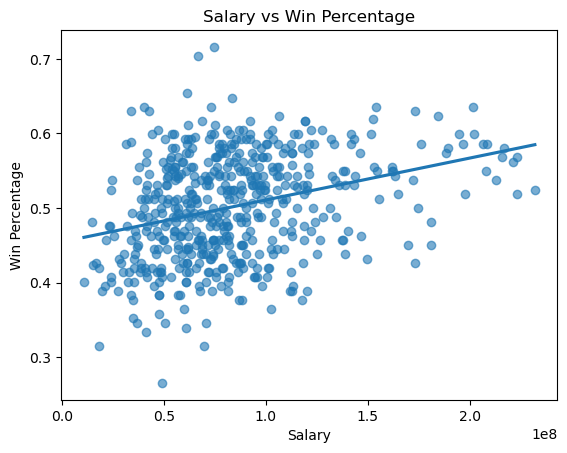

In [144]:
sns.regplot(data=merged_data, x='salary', y='Win%', ci=None, scatter_kws={'alpha': 0.6})

plt.title('Salary vs Win Percentage')
plt.xlabel('Salary')
plt.ylabel('Win Percentage')
plt.show()

### Conduct PCA Analysis 

In [30]:
from sklearn.preprocessing import StandardScaler
success_feats = merged_data[["salary", "BB"]].dropna()
features_std = StandardScaler().fit_transform(success_feats)
features_std = pd.DataFrame(features_std, columns = success_feats.columns)
features_std

,salary,BB
0,-1.051722,-0.219933
1,-1.275033,-0.503289
2,-0.554184,0.292806
3,-0.274992,0.899998
4,-0.664889,0.198354
...,...,...
519,1.492146,-0.004043
520,-0.656383,-1.043015
521,2.316633,-1.218425
522,1.383370,1.426230


In [31]:
u, s, vt = np.linalg.svd(features_std, full_matrices = False)

Text(0, 0.5, 'salary')

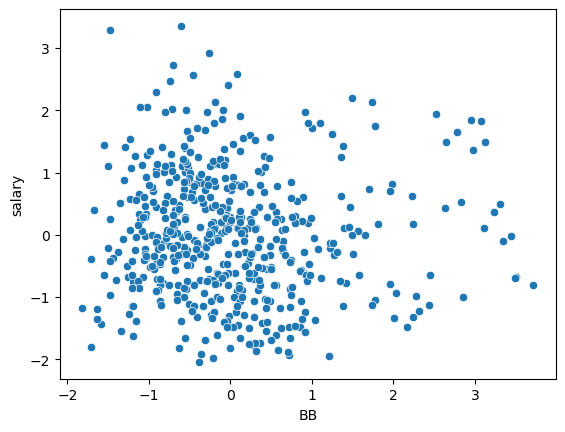

In [32]:
sns.scatterplot(data = features_std, x = "salary", y = "BB")
plt.xlabel("BB")
plt.ylabel("salary")

In [33]:
new_data = features_std @ vt[[0,1]].T
new_data.head()

,0,1
0,-0.588163,-0.899196
1,-0.545705,-1.257463
2,-0.598912,-0.184822
3,-0.830843,0.441946
4,-0.610405,-0.329890


Text(0, 0.5, 'Principal Component 2')

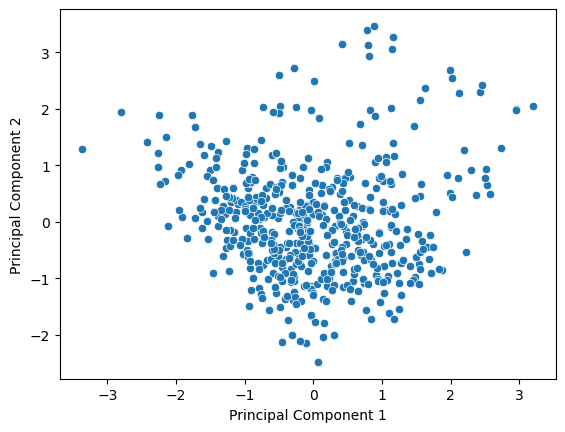

In [34]:
sns.scatterplot(x = new_data[0], y = new_data[1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

In [35]:
team_feats = merged_data[["salary", "BB","Win%", "R"]].dropna()
features_std = StandardScaler().fit_transform(team_feats)
features_std = pd.DataFrame(features_std, columns = team_feats.columns)

In [36]:
u, s, vt = np.linalg.svd(features_std, full_matrices = False)

In [37]:
vt = pd.DataFrame(vt, columns = team_feats.columns, index = ["v1","v2","v3","v4"])
vt

,salary,BB,Win%,R
v1,0.147163,0.560232,0.554232,0.597755
v2,0.873750,-0.306505,0.310169,-0.215432
v3,-0.436411,-0.598194,0.670488,0.046415
v4,-0.156362,0.484107,0.383494,-0.770794


In [38]:
new_teams = features_std @ vt.T
new_teams.head()

,v1,v2,v3,v4
0,0.186504,-0.851215,0.832993,-0.179770
1,-1.820101,-1.197304,-0.138530,0.137454
2,1.835210,-0.101384,1.561600,0.346471
3,0.845306,-0.753510,-0.511620,-0.228404
4,1.433903,-0.673838,0.872343,-0.598355


Text(0, 0.5, 'Var X Explained')

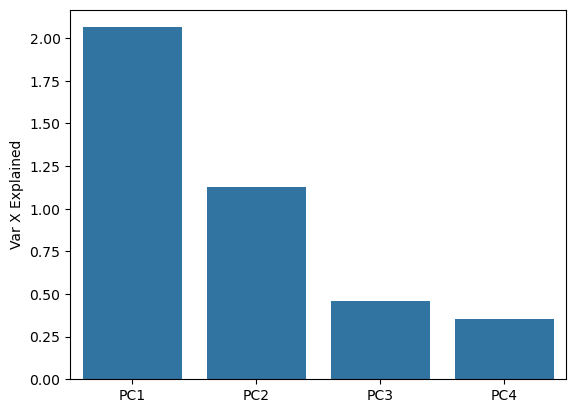

In [39]:
sns.barplot(x = ["PC1", "PC2", "PC3", "PC4"], y = s**2/len(features_std))
plt.ylabel("Var X Explained")

Text(0, 0.5, 'Var X Explained (%)')

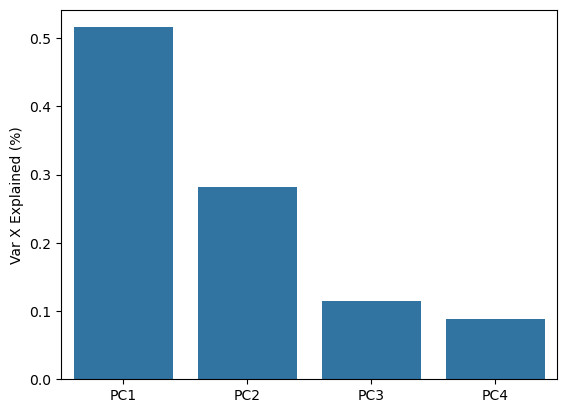

In [40]:
var_explained = s**2/len(features_std)
percent_var_explained = var_explained/np.sum(var_explained)
sns.barplot(x = ["PC1", "PC2", "PC3", "PC4"], y = percent_var_explained)
plt.ylabel("Var X Explained (%)")

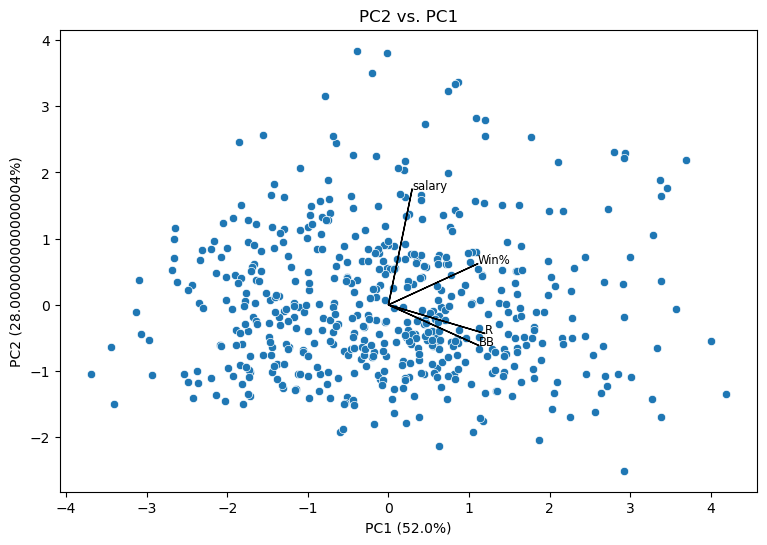

In [41]:
#offsets = np.random.uniform(0, 1, vt.shape[1])*.3
plt.figure(figsize = (9, 6))
plt.title("PC2 vs. PC1")
plt.xlabel(f"PC1 ({np.round(percent_var_explained[0],2)*100}%)")
plt.ylabel(f"PC2 ({np.round(percent_var_explained[1],2)*100}%)")
sns.scatterplot(x = new_teams["v1"], y = new_teams["v2"]);

for i in range(vt.shape[1]):
    plt.arrow(0, 0, vt.iloc[0,i]*2, vt.iloc[1,i]*2, color = "black")
    plt.text(vt.iloc[0,i]*2, vt.iloc[1,i]*2, features_std.columns[i], fontsize = "small")

### Logistic Regression Model to Predict World Series Win.

In [151]:
from sklearn.linear_model import LogisticRegression

feature_columns = ['R', 'BB', '2B', 'Win%']
X = merged_data[feature_columns]
y = merged_data['WSWin']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

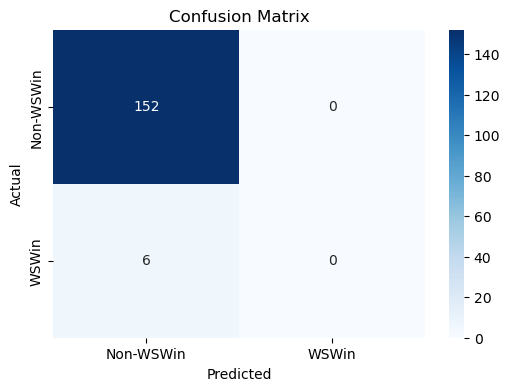

In [153]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-WSWin", "WSWin"], yticklabels=["Non-WSWin", "WSWin"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### Simplify model to just making the Playoffs instead of World Series Win.

In [155]:
# trying to predict making the playoffs win with salary
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

X = merged_data.drop(['WSWin', 'LgWin', 'DivWin', 'PPF', 'BPF', "SV", 'MadePlayoffs', "W", "L", "Rank", "WCWin"], axis=1)
y = merged_data['MadePlayoffs']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances.head()

Win%    0.272099
RA      0.062476
ER      0.057972
ERA     0.057158
R       0.050393
dtype: float64

In [170]:
X = merged_data.drop(['WSWin', 'LgWin', 'DivWin', 'PPF', 'BPF', "SV", 'MadePlayoffs', "W", "L", "Rank", "WCWin"], axis=1)
y = merged_data['MadePlayoffs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       108
           1       0.91      0.86      0.89        50

    accuracy                           0.93       158
   macro avg       0.93      0.91      0.92       158
weighted avg       0.93      0.93      0.93       158

Confusion Matrix:
[[104   4]
 [  7  43]]


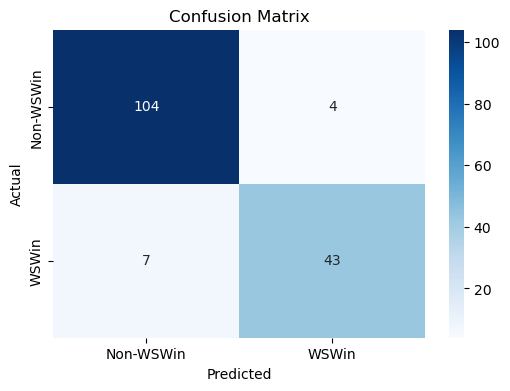

In [172]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Heatmap of Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-WSWin", "WSWin"], yticklabels=["Non-WSWin", "WSWin"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Salary does not seem to be as important as other features in the data**

### Analysis of the Made Playoffs Logistic Regression Model Results

#### **Model Performance Overview**
1. **Accuracy**:  
   The overall accuracy of the model is **93%**, which means the model correctly classified 93% of the instances in the dataset. This indicates strong performance.

2. **Precision and Recall**:
   - **Class 0 (Did not make playoffs)**:  
     - Precision: **94%** - Out of all predicted as not making the playoffs, 94% were correct.  
     - Recall: **96%** - Out of all teams that actually did not make the playoffs, 96% were correctly identified.
   - **Class 1 (Made playoffs)**:  
     - Precision: **91%** - Out of all predicted as making the playoffs, 91% were correct.  
     - Recall: **86%** - Out of all teams that actually made the playoffs, 86% were correctly identified.

   These scores indicate that the model is slightly better at identifying teams that did not make the playoffs compared to those that did.

3. **F1-Score**:
   - Class 0: **0.95** (high balance between precision and recall for this class).  
   - Class 1: **0.89** (still strong but slightly less effective for identifying playoff teams).

#### **Confusion Matrix Analysis**
- **True Negatives (104)**:  
  Teams correctly classified as not making the playoffs.  
- **False Positives (4)**:  
  Teams incorrectly predicted to make the playoffs.  
- **False Negatives (7)**:  
  Teams that made the playoffs but were predicted as not making it.  
- **True Positives (43)**:  
  Teams correctly classified as making the playoffs.

### Summary of Findings

Determining a teams success can get very muddied by different factors. For example, The World Series model demonstrates strong performance in classifying **not WS Win** versus **WS Win**, with high overall accuracy. However, this performance is primarily due to the models ability to identify teams that did not win the World Series (negative class), while it struggles to predict World Series winners (positive class). Gauging weather a team makes the playoffs is much more realistic to the model and data available.

### Mechanism behind Hitting Statistics Importance 

#### **The Importance of Walks and Doubles to Team Success**
while looking at feature importance common top features were Walks (BB) and Doubles (2B)
1. **Walks: The Value of Plate Discipline**  
   Walks reflect a player's ability to maintain plate discipline, avoiding unnecessary swings and forcing pitchers into high-stress situations. Teams that prioritize players with high on-base percentages (OBP) gain more opportunities to score, as baserunners create pressure and extend innings. This strategy is both cost-effective and reliable, especially in high-stakes games.

2. **Doubles: The Impact of Gap Power**  
   Doubles are one of the most valuable offensive outcomes, providing consistent run production without relying on home runs. Players who excel at hitting doubles often drive in runners and set up scoring opportunities for teammates. Moreover, doubles are less volatile than home runs, making them a steady source of offense in the playoffs when pitching dominates. Adding on top of this with context, being on second base is considered "scoring position" in baseball.

   
#### Key Observations of World Series model poor performance:
1. **Imbalanced Dataset**:
   - The dataset contains significantly more examples of teams that did not win the World Series than those that did. This imbalance results in the model prioritizing the majority class (**not WS Win**) to maximize accuracy.

2. **Salary's Limited Predictive Power**:
   - Feature importance analysis and PCA suggest that salary is not a strong predictor of World Series success. Team performance metrics like win percentage `Win%` and runs scored `R` are more significant contributors.
   - High payrolls do not guarantee postseason success, as team dynamics, strategies, and other performance metrics play a larger role.

3. **Why the Model Performs Well for "Not WS Win"**:
   - **Majority Class Bias**: 
     - The high prevalence of **not WS Win** examples leads the model to classify most observations as negative, achieving high accuracy.
   - **Feature Relationships**:
     - Features like `Win%` correlate with **not WS Win**, making it easier for the model to identify teams that were less competitive overall.

#### Why Salary is Not Important:
- Historical trends demonstrate that higher payrolls do not directly correlate with postseason success. Teams with lower salaries often succeed due to efficient player development, advanced analytics, and cohesive teamwork.
- The variability in World Series outcomes introduces noise, further reducing salary's contribution to the model's predictive power.

### Conclusion:
From the finding the narrative of teams needing to spend more money to succeed is no longer valid. Salary is not the driving factor in successful teams but rather good hitters are. Predicing a World Series win is not accurate because many unmeasured factors go into it. The World Series model performs well in predicting **not WS Win** outcomes but requires adjustments to better identify **WS Win** results. Improvements can include addressing the class imbalance using oversampling, undersampling, or class weighting techniques. Furthermore, incorporating additional features that capture postseason-specific performance (e.g., playoff stats, pitching metrics) may improve the model's abi
